# Decision Tree examples

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
df['species']=df['species'].map({'setosa':0,'versicolor':1, 'virginica':2})

In [7]:
df['species'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()
params = {
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth": [1,2,3,5,7,4,9,8,6],
    "max_features":["sqrt","log2",None],
    "class_weight":["balanced",None]
}
decision_tree_classifier = GridSearchCV(classifier,params,scoring='accuracy',cv=10)
decision_tree_classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])
print(decision_tree_classifier.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}


C:\Users\shreyas.banagar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shreyas.banagar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shreyas.banagar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\shreyas.banagar\AppData\Local\Continuum\anaconda3\lib\site-pa

[Text(0.5357142857142857, 0.9285714285714286, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4642857142857143, 0.7857142857142857, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6071428571428571, 0.7857142857142857, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.35714285714285715, 0.6428571428571429, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.21428571428571427, 0.5, 'X[1] <= 2.55\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.14285714285714285, 0.35714285714285715, 'X[2] <= 4.45\ngini = 0.133\nsamples = 14\nvalue = [0, 13, 1]'),
 Text(0.07142857142857142, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.21428571428571427, 0.21428571428571427, 'X[3] <= 1.6\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.14285714285714285, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.2857142857142857, 0.07142857142857142, 'gini = 0

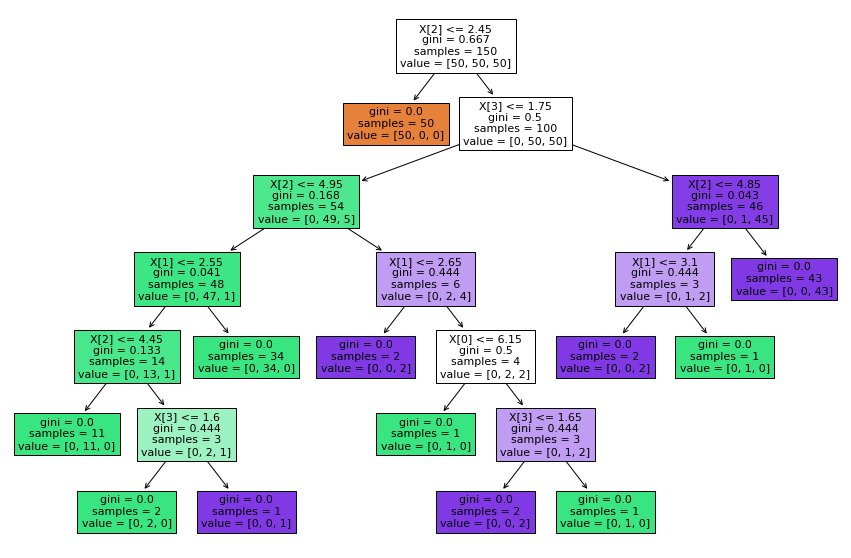

In [13]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree_classifier.best_estimator_,filled=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
...     df.iloc[:,:-1], df.iloc[:,-1], test_size=0.33, random_state=42)

In [26]:
print(pd.DataFrame(classifier.predict(X_test),y_test))

         0
species   
1        1
0        0
2        2
1        1
1        1
0        0
1        1
2        2
1        1
1        1
2        2
0        0
0        0
0        0
0        0
1        1
2        2
1        1
1        1
2        2
0        0
2        2
0        0
2        2
2        2
2        2
2        2
2        2
0        0
0        0
0        0
0        0
1        1
0        0
0        0
2        2
1        1
0        0
0        0
0        0
2        2
1        1
1        1
0        0
0        0
1        1
2        1
2        2
1        1
2        2
